## linear regression with gradient descent

### Theory

the relationship between dependant and independant variables is given by

$\hat{y} = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + ... + \theta_n * x_n$  

where 

* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the ith feature value
* $\theta_j$ is the jth model parameter
* $\theta_0$ is the bias weight while $\theta_1$ to $\theta_n$ are feature weights

in simple linear regression we have only one independant variable x1

#### vectorized / linear algebra form

$\hat{y} = \theta^{T}.x$

where

* $\theta$ is the model parameter vector containing bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$
* $\theta^{T}$ is the transpose of parameter vector (row vector instead of column vector)
* $x$ is that instance's feature vector containing $x_0$ to $x_n$ where $x_0$ is always 

#### MSE cost function

$MSE(X) = \frac{1}{m} * \sum_{i=1}^{m}{(\theta^T.x^{(i)} - y^{(i)})}$

where

* $X$ is the entire dataset
* $m$ is the number if instances in the dataset
* $x^{(i)}$ is the feature vector of ith instance in the dataset
* $y^{(i)}$ is the desired output for that instance

#### Normal equation / analytical method

$\hat{\theta} = (X^T.X)^{-1}.X^T.y$

where

* $\hat{\theta}$ is the value of $\theta$ minimizing the cost function

#### gradient descent

for gradient descent we have to calculate partial derivate of cost function wrt each model parameter

$\frac{\partial{MSE(\theta)}}{\partial{\theta_j}} = \frac{2}{m}\sum_{i=1}^{m}{(\theta^T.x^{(i)}-y^{(i)})}x^{(i)}_{j}$

we can calculate gradients of all model parameters wrt cost function in one computation using the equation

$\nabla MSE(\theta) = \frac{2}{m}X^{T}.(X.\theta - y) $

where

* $\nabla MSE(\theta)$ is the gradient vector containing gradients of all model parameters wrt cost function

to calculate next value of parameter vectors

$\theta^{(next step)} = \theta - \eta\nabla MSE(\theta)$ 

where

* $\eta$ is the learning rate

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [33]:
# dataset for linear regression
dataset = datasets.load_diabetes()

In [35]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [34]:
# converting dataset to pandas dataframe to make code compatible with any generic dataset
# to create dataframe from csv file use pd.read_csv function
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# using linear regression to predict relation between hdl and blood pressure

In [36]:
# extracting blood pressure as y
bp_series = df['bp']
y = bp_series.to_numpy()

# converting y into column matrix
y_len = y.size
y = y.reshape(y_len,1)

# observe the shape of y
print(y.shape)
print(y[:5,:])

(442, 1)
[[ 0.02187239]
 [-0.02632753]
 [-0.00567042]
 [-0.03665608]
 [ 0.02187239]]


In [41]:
# extracting bmi as X
hdl_series = df['bmi']
X = hdl_series.to_numpy()

# converting X into column matrix
X_len = X.size
X = X.reshape(X_len,1)
# observe the shape of y
print(X.shape)
print(X[:5,:])

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


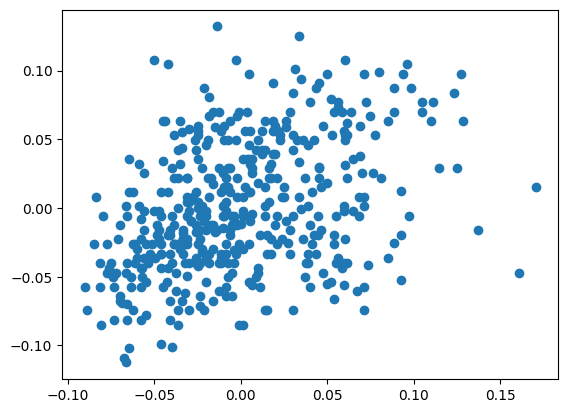

In [42]:
# plotting y against x
plt.scatter(X,y)
plt.show()

In [60]:
# adding 1 to all feature vectors
X_new = np.hstack((np.ones((X_len,1)),X))
X_new[:5,:]

array([[ 1.        ,  0.06169621],
       [ 1.        , -0.05147406],
       [ 1.        ,  0.04445121],
       [ 1.        , -0.01159501],
       [ 1.        , -0.03638469]])

In [67]:
# analytical method
# theta_best = np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)
# print(theta_best)
# y_pred = X_new.dot(theta_best)
# plt.scatter(X,y)
# plt.scatter(X,y_pred)

In [ ]:
# gradient descent

